In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston;
X, y = load_boston(return_X_y = True);
data = load_boston();
df = pd.DataFrame(data.data, columns = data.feature_names);
df.head()

C:\Users\sfrie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Ridge Linear Regression

Ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

Order of Operations:

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.




In [2]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X): #The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.
    padding = np.ones(( X.shape[0], 1,))
    return np.hstack((padding, X))
  
  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    self.X = self.pad(np.array(X))
    self.Y = np.array(Y)
    self.w = np.linalg.pinv(self.X) @ self.Y
  
  def _fit(self, X, Y):
    # optional to use this
    pass
  
  def predict(self, X):
    self.X = self.pad(X) #Pads the new input, now is same dimensionality as w
    self.labels = self.X @ self.w
    return self.labels
    
  def _predict(self, X):
    # optional to use this
    pass
    
  def score(self, X, Y):
    # w = self.fit(X,Y)
    self.X = X
    self.Y = Y
    pred = self.predict(self.X) #predict does the padding for X
    return np.square(np.subtract(self.Y ,pred)).mean()
    # return np.sum((self.Y - pred)**2) / Y.shape[0]

In [3]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda = 0.1, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    self.learning_rate = 1000
    
  def _fit(self, X, Y):
    self.X = self.pad(X)
    self.Y = Y
    temp=self.X.T@self.X
    self.w = (np.linalg.inv(temp +  self.ridge_lambda* np.identity(temp.shape[0])) @ self.X.T@ self.Y)

In [4]:
#Use scikitlearn implementation for OLS, Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import normalize


21.895280305617835


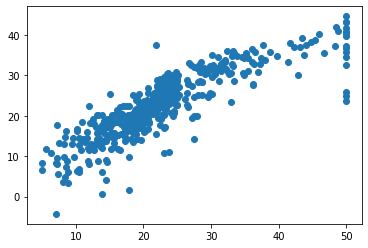

In [7]:
ridg = RidgeLs(0.01)
ridg._fit(X, y)

y_pred=(ridg.predict(X))
print(ridg.score(X,y))
plt.scatter(y,y_pred)

OLS comparing 

my OLS score: 0.605891841372284
sklearn OLS score: 0.6058918413722822


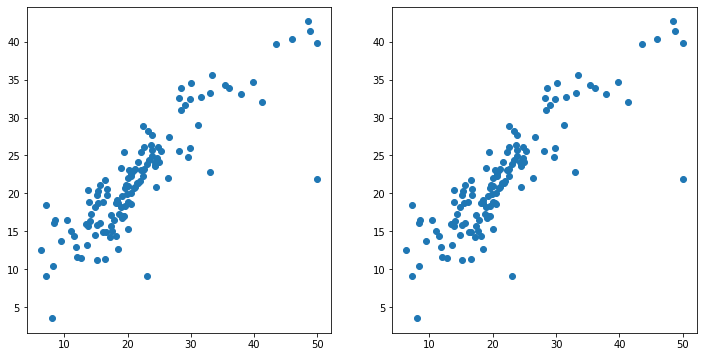

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .25, shuffle= True)

X_test_norm = X_test - X_test.mean() / X_test.std()

Grad = Ols()
Grad.fit(X_train, Y_train)
y_pred=Grad.predict(X_test)
print("my OLS score:",r2_score(y_pred,Y_test))

fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(Y_test ,y_pred)
plt.subplot(1,2,2)

reg = LinearRegression().fit(X_train, Y_train)
pred = reg.predict(X_test)
print("sklearn OLS score:" , r2_score(pred,Y_test))
plt.scatter(Y_test, pred)

comparing Ridge Linear Regression

my Ridge score: 0.6044801534741886
sklearn Ridge score: 0.6056564040321113


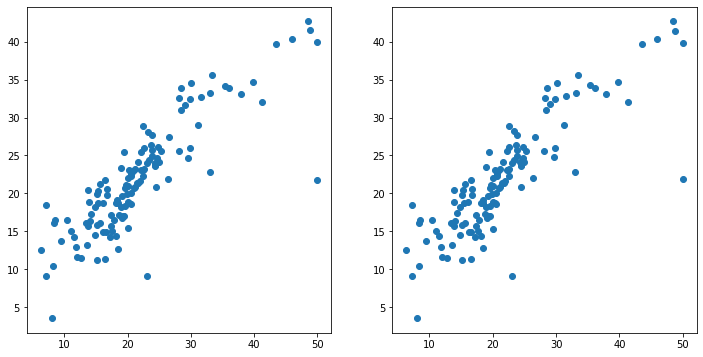

In [11]:
from sklearn.linear_model import Ridge


ridg = RidgeLs(0.01)
ridg._fit(X_train, Y_train)
y_pred_myridge=(ridg.predict(X_test))
print("my Ridge score:",r2_score(y_pred_myridge,Y_test))

fig = plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.scatter(Y_test, y_pred_myridge)

plt.subplot(1,2,2)

clf = Ridge(alpha=0.01)
clf.fit(X_train, Y_train)
y_pred_skl=clf.predict(X_test)
print("sklearn Ridge score:",r2_score(y_pred_skl,Y_test))
plt.scatter(Y_test ,y_pred_skl)


compring to Lasso  

sklearn Lasso score: 0.5797836860466146


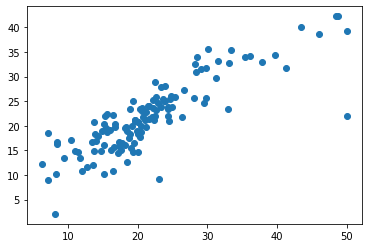

In [12]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train,Y_train)
y_pred_lasso= clf.predict(X_test)

print("sklearn Lasso score:",r2_score(y_pred_lasso,Y_test))
plt.scatter(Y_test ,y_pred_lasso)